In [ ]:
# Download the data stored in a zipped numpy array from one of these two locations
# The uncommented one is likely to be faster. If you're running all your experiments
# on a machine at home rather than using colab, then make sure you save it
# rather than repeatedly downloading it.

#!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz" -O training_images.npz

# The test images (without points)
#!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "https://sussex.box.com/shared/static/xxlgvjpa86s6xgjzy5im06saoj57s7gt.npz" -O test_images.npz

# The example images are here
#!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz
!wget "https://sussex.box.com/shared/static/kbodelmaqw5dd59i5x2kis55lor7ydhf.npz" -O examples.npz

--2022-05-10 18:50:25--  https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.box.com (sussex.box.com)... 107.152.29.197
Connecting to sussex.box.com (sussex.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-10 18:50:25--  https://sussex.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Reusing existing connection to sussex.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-10 18:50:26--  https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.app.box.com (sussex.app.box.com)... 185.235.236.201
Connecting to sussex.app.box.com (sussex.app.box.com)|185.235.236.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Lo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import cv2
import random

In [ ]:
def visualise_pts(img, pts):
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

In [ ]:
images_data = np.load('training_images.npz', allow_pickle=True)
test_images_data = np.load("test_images.npz", allow_pickle=True)
examples_images_data = np.load("examples.npz", allow_pickle=True)
train_images = images_data['images']
train_points = images_data['points']
example_images = examples_images_data['images']

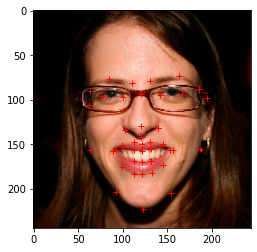

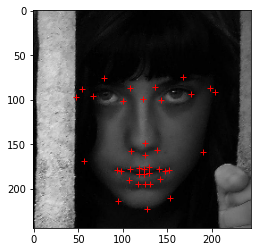

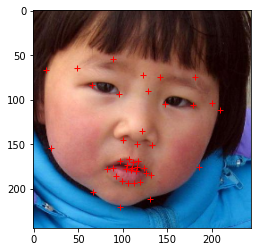

In [ ]:
for i in range(3):
  index = np.random.randint(0, train_images.shape[0])
  visualise_pts(train_images[index, ...], train_points[index, ...])

In [ ]:
def rgb2gray(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

In [ ]:
def blur(img):
  blur = cv2.bilateralFilter(img,20,20,20) # you can change the parameteres
  return blur

In [ ]:
gray_image = []
for image in train_images:
  gray_image.append(rgb2gray(image))
gray_image = np.array(gray_image)

In [ ]:
blur_image = []
for image in train_images:
  blur_image.append(blur(image))
blur_image = np.array(blur_image)

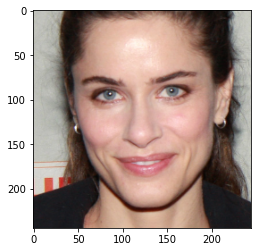

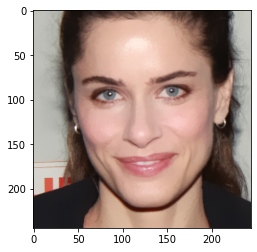

In [ ]:
plt.imshow(train_images[0])
plt.show()
plt.imshow(blur_image[0])
plt.show()

In [ ]:
normalize_train_images = train_images/255
x_train = normalize_train_images[:-300]
x_test = normalize_train_images[-300:]
y = train_points/244
y = np.reshape(y,(-1,84))
y_train = y[:-300]
y_test = y[-300:]

In [ ]:
first_filter_layer = 32
second_filter_layer = 64
third_filter_layer = 84
kernel_size = (4,4)
max_pool_size = (3,3)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2511, 244, 244, 3) (300, 244, 244, 3) (2511, 84) (300, 84)


In [ ]:
model = Sequential()
model.add(Conv2D(first_filter_layer, kernel_size, activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(first_filter_layer, kernel_size, activation="relu"))
model.add(Conv2D(first_filter_layer, kernel_size, activation="relu"))
model.add(MaxPooling2D(pool_size=max_pool_size))

model.add(Conv2D(second_filter_layer, kernel_size, activation="relu"))
model.add(Conv2D(second_filter_layer, kernel_size, activation="relu"))
model.add(Conv2D(second_filter_layer, kernel_size, activation="relu"))
model.add(MaxPooling2D(pool_size = max_pool_size))

model.add(Flatten())
model.add(Dense(third_filter_layer))
model.add(Activation("sigmoid"))
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mse"])

model_history = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/5
79/79 [==============================] - 61s 669ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2/5
79/79 [==============================] - 46s 582ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 7.8239e-04 - val_mse: 7.8239e-04
Epoch 3/5
79/79 [==============================] - 46s 582ms/step - loss: 6.2590e-04 - mse: 6.2590e-04 - val_loss: 5.2109e-04 - val_mse: 5.2109e-04
Epoch 4/5
79/79 [==============================] - 46s 582ms/step - loss: 4.8972e-04 - mse: 4.8972e-04 - val_loss: 4.7692e-04 - val_mse: 4.7692e-04
Epoch 5/5
79/79 [==============================] - 46s 582ms/step - loss: 4.4139e-04 - mse: 4.4139e-04 - val_loss: 4.4759e-04 - val_mse: 4.4759e-04


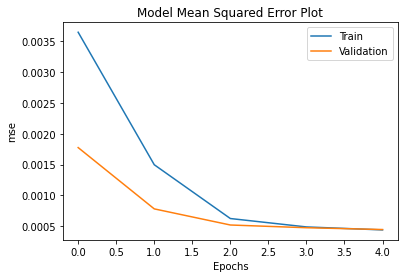

In [ ]:
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('Model Mean Squared Error Plot')
plt.ylabel('mse')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 241, 241, 32)      1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 238, 32)      16416     
                                                                 
 conv2d_2 (Conv2D)           (None, 235, 235, 32)      16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        32832     
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        65600     
                                                        

In [ ]:
def visualise_pts_comparison(img, pts, title_num=0):
  titles = ["Actual", "Predicted"]
  plt.imshow(img,cmap='gray')
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.title(titles[title_num])
  plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions *= 244

In [ ]:
for i in range(300):
    visualise_pts_comparison(train_images[2611+i, ...], train_points[2611+i, ...],0)
    visualise_pts_comparison(x_test[i, ...], predictions[i, ...].reshape(42,2),1)

In [ ]:
def euclid_distance(pred_points, actual_points):
  pred_pts = np.reshape(pred_points, (-1, 2))
  gt_pts = np.reshape(actual_points, (-1, 2))
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))

In [ ]:
def autolabel(rects, ax):
      height_list = []
      for rect in rects:
          height = rect.get_height()
          height_list.append(height)
          ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                  '%d' % int(height),
                  ha='center', va='bottom')
      return max(height_list)

In [ ]:
def average_euclidian_distance(preds):

  total_list = list()
  jaw_list = list()
  eyebrows_list = list()
  nose_list = list()
  eyes_list = list()
  lips_list = list()

  for i in range(300):
    euclid_totals = euclid_distance(preds[i].reshape(42,2),train_points[2511+i])
    total_list.append(euclid_totals)
    jaw_list.append(np.mean(euclid_totals[0:6]))
    eyebrows_list.append(np.mean(euclid_totals[7:12]))
    nose_list.append(np.mean(euclid_totals[13:17]))
    eyes_list.append(np.mean(euclid_totals[18:21]))
    lips_list.append(np.mean(euclid_totals[22:42]))


  total_vals = np.mean(total_list)
  jaw_total = np.mean(jaw_list)
  eyebrows_total = np.mean(eyebrows_list)
  nose_total = np.mean(nose_list)
  eyes_total = np.mean(eyes_list)
  lips_total = np.mean(lips_list)

  facial_areas = ["Jaw", "Eyebrows", "Nose", "Eyes", "Lips", "All Areas"]
  facial_area_vals = [jaw_total, eyebrows_total,
                      nose_total, eyes_total,
                      lips_total, total_vals]
  fig, ax = plt.subplots()
  ax.set_ylabel("Mean Euclidian Distance")
  rects1 = ax.bar(facial_areas,facial_area_vals, color="r")
  max_height = autolabel(rects1,ax)
  ax.set_ylim(0,max_height+max_height/5)
  plt.title("Average Euclidian Distances")
  plt.show()
  print("Avg: ",total_vals)

  return total_vals

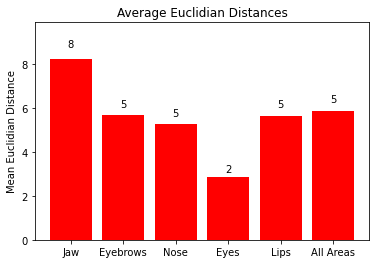

Avg:  5.878195682578084


5.878195682578084

In [ ]:
average_euclidian_distance(predictions)

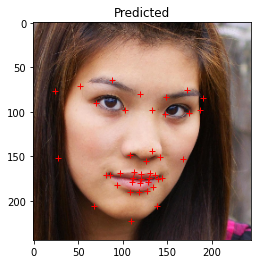

In [ ]:
visualise_pts_comparison(x_test[6, ...], predictions[6, ...].reshape(42,2),1)

In [ ]:
test_image = x_test[6, ...]

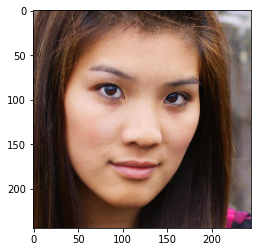

In [ ]:
plt.imshow(test_image)

In [ ]:
pred_point = predictions[6, ...].reshape(42,2)
lips_points = [pred_point[x] for x in range(22, 42)]
print(lips_points)
print(len(lips_points))

[array([ 80.786606, 170.36256 ], dtype=float32), array([ 97.45096, 168.26865], dtype=float32), array([112.38219, 167.26262], dtype=float32), array([120.974304, 169.94322 ], dtype=float32), array([130.466  , 168.21657], dtype=float32), array([136.42055, 170.74289], dtype=float32), array([144.22325, 174.24916], dtype=float32), array([134.44174, 184.38925], dtype=float32), array([126.68558, 189.29948], dtype=float32), array([117.67255, 190.37834], dtype=float32), array([108.0708 , 189.43214], dtype=float32), array([ 93.798645, 182.40446 ], dtype=float32), array([ 85.71239, 170.97287], dtype=float32), array([111.17452, 174.1744 ], dtype=float32), array([120.063805, 175.56058 ], dtype=float32), array([129.37503, 174.53535], dtype=float32), array([139.57004, 175.42851], dtype=float32), array([128.56938, 178.2204 ], dtype=float32), array([118.84947, 179.72876], dtype=float32), array([110.35133, 178.369  ], dtype=float32)]
20


In [ ]:
outlines = [np.asarray(lips_points, dtype=np.int32)]
(x, y, w, h) = cv2.boundingRect(outlines[0])

In [ ]:
print(x,y,w,h)

80 167 65 24


In [ ]:
center = (int(x+w/2), int(y+h/2))

In [ ]:
def get_lip_mask(size, lips):
    hull_index = cv2.convexHull(np.array(lips), returnPoints=False)
    hull_int = []
    for i in hull_index:
        hull_int.append(lips[i[0]])
    mask = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.int32(hull_int), (255, 255, 255))
    return mask

In [ ]:
mask = get_lip_mask(test_image.shape, lips_points)

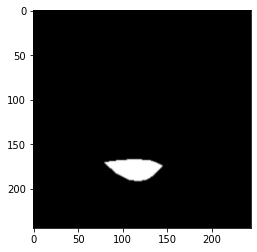

In [ ]:
mask_height, mask_width = mask.shape[0:2]
mask_s = cv2.resize(mask, (600, int(mask_height * 600.0 / mask_width)))
mask_s = cv2.dilate(mask_s, (3, 3))
mask_s = cv2.GaussianBlur(mask_s, (5, 5), 0, 0)
mask = cv2.resize(mask_s, (mask_width, mask_height))
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)

In [ ]:
lip_colors = {"a": (98, 46, 131),
              "b": (52, 31, 137),
              "c": (40, 30, 190),
              "d": (65, 45, 222),
              "e": (122, 131, 201),
              "f": (100, 92, 223),
              "g": (75, 32, 223),
              "h": (135, 64, 243),
              "i": (106, 39, 184),
              "j": (94, 67, 164)}

In [ ]:
def apply_color_to_mask(mask):
    color_name, color = random.choice(list(lip_colors.items()))
    b, g, r = cv2.split(mask)
    b = np.where(b > 0, color[0], 0).astype('uint8')
    g = np.where(g > 0, color[1], 0).astype('uint8')
    r = np.where(r > 0, color[2], 0).astype('uint8')
    return cv2.merge((b, g, r)), color_name

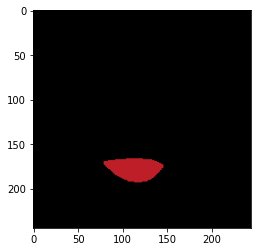

In [ ]:
color_mask, color_name = apply_color_to_mask(mask)
color_mask_rgb = cv2.cvtColor(color_mask,cv2.COLOR_BGR2RGB)
plt.imshow(color_mask_rgb)

In [ ]:
plt.imsave('name.png', test_image)

In [ ]:
img = cv2.imread('name.png')

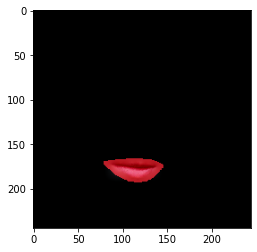

In [ ]:
masked_lips = cv2.bitwise_and(img, img, mask=mask[:, :, 0])
output = cv2.seamlessClone(masked_lips, color_mask, mask[:, :, 0], center, cv2.MIXED_CLONE)
output_rgb = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)

In [ ]:
def blending(alpha, front, background):
    fore = np.zeros(front.shape, dtype=front.dtype)
    fore = cv2.multiply(alpha, front, fore, 1 / 255.0)
    alpha = np.ones(alpha.shape, dtype=alpha.dtype) * 255 - alpha
    back = np.zeros(background.shape, dtype=background.dtype)
    back = cv2.multiply(alpha, background, back, 1 / 255.0)
    out_image = cv2.add(fore, back)
    return out_image

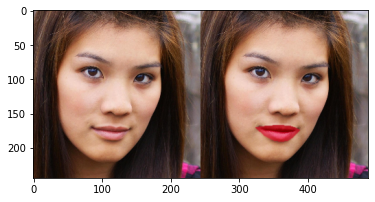

In [ ]:
final = blending(mask, output, img)
final_image = np.hstack((img, final))
final_image = cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB)
plt.imshow(final_image)

In [ ]:
output_image = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)

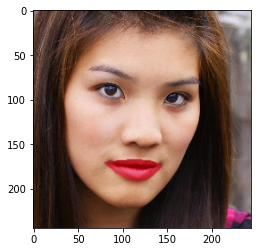

In [ ]:
plt.imshow(output_image)

EYE


In [ ]:
pred_point = predictions[6, ...].reshape(42,2)
eye_points1 = [pred_point[x] for x in range(18, 20)]
eye_points2 = [pred_point[x] for x in range(20, 22)]

print(eye_points1)
print(eye_points2)

[array([69.805984, 89.60927 ], dtype=float32), array([102.76201 ,  97.990364], dtype=float32)]
[array([147.14673 , 102.555016], dtype=float32), array([174.44685 , 100.693924], dtype=float32)]


In [ ]:
outlines1 = [np.asarray(eye_points1, dtype=np.int32)]
(center1, radius) = cv2.minEnclosingCircle(outlines1[0])
outlines2 = [np.asarray(eye_points2, dtype=np.int32)]
(x2, y2, w2, h2) = cv2.boundingRect(outlines2[0])
center1 = (int(center1[0]), int(center1[1]))
x = round(radius)
print(x)
print(center1)

17
(85, 93)


In [ ]:
img1 = cv2.imread('name.png')

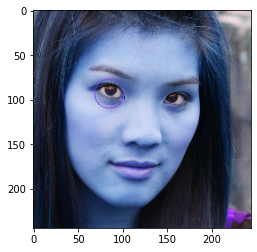

In [ ]:
cv2.circle(img1,center1, x, (135, 64, 243),1)
plt.imshow(img1)

In [ ]:
def get_EYE_mask(size, eye):
    hull_index = cv2.convexHull(np.array(eye), returnPoints=False)
    hull_int = []
    for i in hull_index:
        hull_int.append(eye[i[0]])
    mask = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.int32(hull_int), (255, 255, 255))
    return mask

In [ ]:
mask = get_EYE_mask(test_image.shape, eye_points1)

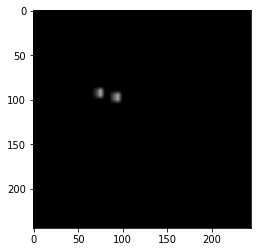

In [ ]:
mask_height, mask_width = mask.shape[0:2]
mask_s = cv2.resize(mask, (50, int(mask_height * 50.0 / mask_width)))
mask_s = cv2.dilate(mask_s, (4, 4))
#mask_s = cv2.GaussianBlur(mask_s, (5, 5), 0, 0)
mask = cv2.resize(mask_s, (mask_width, mask_height))
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)

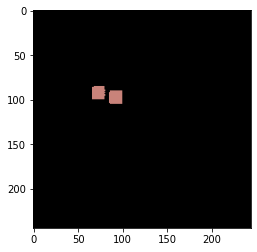

In [ ]:
color_mask, color_name = apply_color_to_mask(mask)
color_mask_rgb = cv2.cvtColor(color_mask,cv2.COLOR_BGR2RGB)
plt.imshow(color_mask_rgb)

In [ ]:
plt.imsave('name.png', test_image)

In [ ]:
img1 = cv2.imread('name.png')

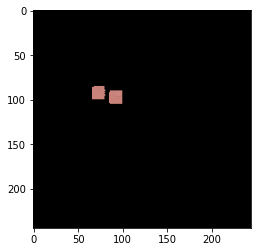

In [ ]:
masked_eye = cv2.bitwise_and(img1, img1, mask=mask[:, :, 0])
output = cv2.seamlessClone(masked_eye, color_mask, mask[:, :, 0], center1, cv2.MIXED_CLONE)
output_rgb = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)

In [ ]:
def blending(alpha, front, background):
    fore = np.zeros(front.shape, dtype=front.dtype)
    fore = cv2.multiply(alpha, front, fore, 1 / 255.0)
    alpha = np.ones(alpha.shape, dtype=alpha.dtype) * 255 - alpha
    back = np.zeros(background.shape, dtype=background.dtype)
    back = cv2.multiply(alpha, background, back, 1 / 255.0)
    out_image = cv2.add(fore, back)
    return out_image

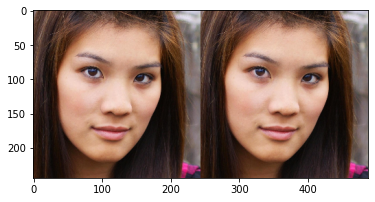

In [ ]:
final = blending(mask, output, img1)
final_image = np.hstack((img, final))
final_image = cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB)
plt.imshow(final_image)

In [ ]:
output_image = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)

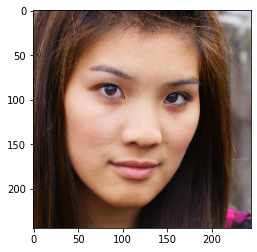

In [ ]:
plt.imshow(output_image)

In [ ]:
def save_as_csv(points, location = '.'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==2*42, 'wrong number of points provided. There should be 42 points with 2 values (x,y) per point'
    np.savetxt(location + '/results.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')